In [18]:
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt

In [8]:
filename_wav = "./audio/p257_143__clean.wav"
filename_noise = "./audio/p257_143__background.wav"
filename_mix = "./audio/p257_143__mixed_conditioned0_2dB.wav"

In [4]:
!ffprobe "./audio/p257_143__clean.wav"

ffprobe version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2007-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --en

In [ ]:
y, sr = librosa.load(filename, sr=16000)

In [7]:
import IPython.display as ipd
ipd.Audio(filename_wav) # load a local WAV file

In [9]:
import IPython.display as ipd
ipd.Audio(filename_noise) # load a local WAV file

In [10]:
import IPython.display as ipd
ipd.Audio(filename_mix) # load a local WAV file

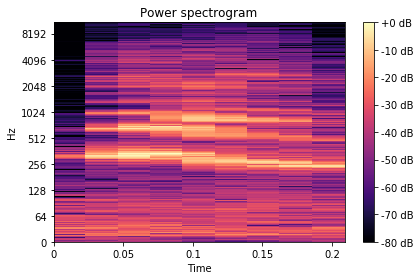

In [21]:
y, sr = librosa.load(filename_wav, sr=16000)

D = librosa.stft(y, sr)
magnitude, phase = librosa.magphase(D)

librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

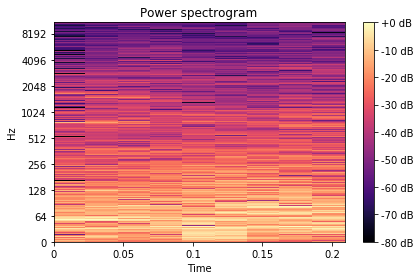

In [20]:
y, sr = librosa.load(filename_noise, sr=16000)

D = librosa.stft(y, sr)
magnitude, phase = librosa.magphase(D)

librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

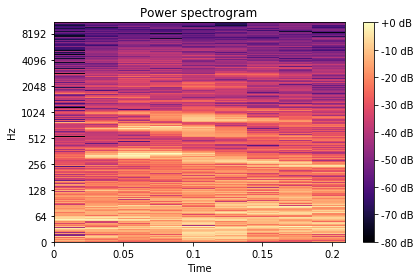

In [19]:
y, sr = librosa.load(filename_mix, sr=16000)

D = librosa.stft(y, sr)
magnitude, phase = librosa.magphase(D)

librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [38]:
y, sr = librosa.load(filename_wav, sr=16000)

power_wav = np.mean(np.power(y, 2))
print(power_wav, y.shape)

y, sr = librosa.load(filename_noise, sr=16000)

power_noise = np.mean(np.power(y, 2))
print(power_noise, y.shape)

0.00966237 (32800,)
0.005672276 (32800,)


In [39]:
dB = 10 * (np.log10(power_wav) - np.log10(power_noise))
print(dB)

2.313261032104492


In [31]:
y_mix, sr_mix = librosa.load(filename_mix, sr=16000)
y_noise, sr_noise = librosa.load(filename_noise, sr=16000)

estimated_wav = y_mix - y_noise

librosa.output.write_wav("./estimated.wav", estimated_wav, sr=sr_mix)

In [35]:
y_wav, sr_wav = librosa.load(filename_wav, sr=16000)
y_est, sr_est = librosa.load("./estimated.wav", sr=16000)

print(y_wav - y_est)

for i in (y_wav - y_est):
    if i != 0.:
        print(i)


[0. 0. 0. ... 0. 0. 0.]


In [32]:
import IPython.display as ipd
ipd.Audio("./estimated.wav")

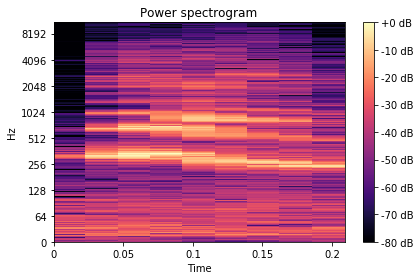

In [33]:
y_est, sr_est = librosa.load("./estimated.wav", sr=16000)

D = librosa.stft(y_est, sr_est)
magnitude, phase = librosa.magphase(D)

librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()